In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('../data/raw/british/british_data.csv')
data.drop(columns=['System Sell Price(GBP/MWh)'], inplace=True)
data.rename(columns={
    'System Buy Price(GBP/MWh)': 'lambda_IM'
}, inplace=True)
data['system_state'] = np.where(data['Net Imbalance Volume(MWh)'] > 0, 'Long', 'Short')
data = data.iloc[:40000]

In [40]:
short_table = data[data['system_state'] == 'Short']
long_table = data[data['system_state'] == 'Long']

print(short_table['lambda_IM'].describe())
print(long_table['lambda_IM'].describe())

count    19634.000000
mean        21.906650
std         16.218726
min        -88.000000
25%         12.000000
50%         23.550000
75%         32.010000
max        283.280000
Name: lambda_IM, dtype: float64
count    20366.000000
mean        60.387498
std         63.062211
min        -29.240000
25%         45.500000
50%         54.950000
75%         66.900000
max       4000.000000
Name: lambda_IM, dtype: float64


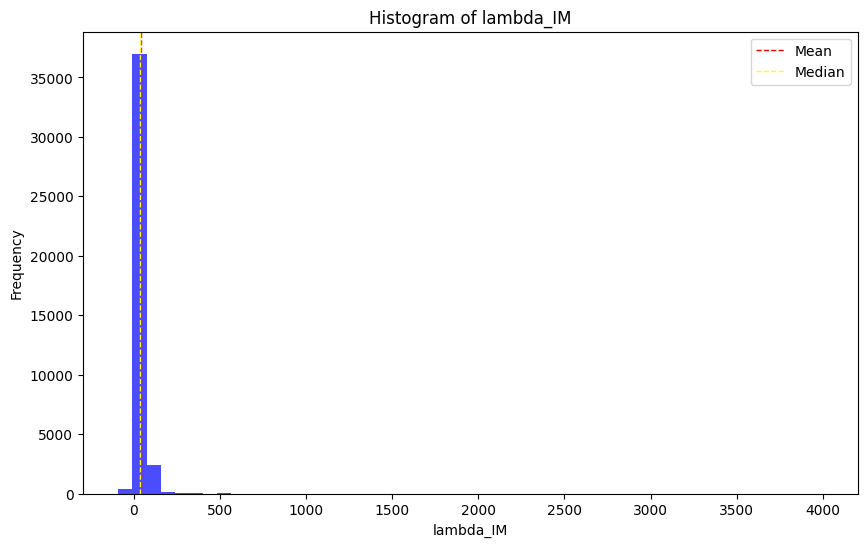

Mean of lambda_IM: 41.49917398424999
Median of lambda_IM: 39.45


In [41]:
#make histogram of lambda_IM and calculate mean and median
plt.figure(figsize=(10, 6))
plt.hist(data['lambda_IM'], bins=50, color='blue', alpha=0.7)
plt.axvline(data['lambda_IM'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['lambda_IM'].median(), color='yellow', linestyle='dashed', linewidth=1)
plt.title('Histogram of lambda_IM')
plt.xlabel('lambda_IM')
plt.ylabel('Frequency')
plt.legend({'Mean': data['lambda_IM'].mean(), 'Median': data['lambda_IM'].median()})
plt.show()

# Calculate the mean and median
mean_lambda = data['lambda_IM'].mean()
median_lambda = data['lambda_IM'].median()
print(f'Mean of lambda_IM: {mean_lambda}')
print(f'Median of lambda_IM: {median_lambda}')

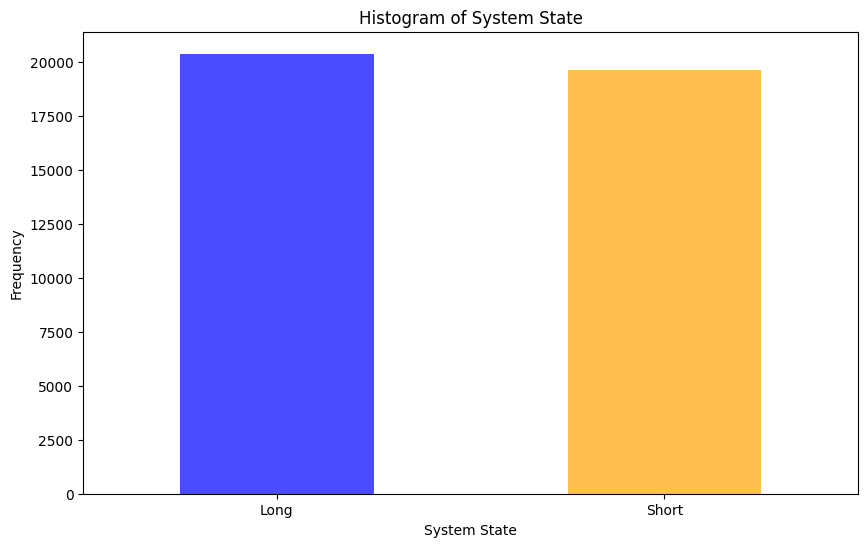

In [42]:
#make histogram of system_state
plt.figure(figsize=(10, 6))
data['system_state'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Histogram of System State')
plt.xlabel('System State')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [43]:
from matplotlib.ticker import MaxNLocator


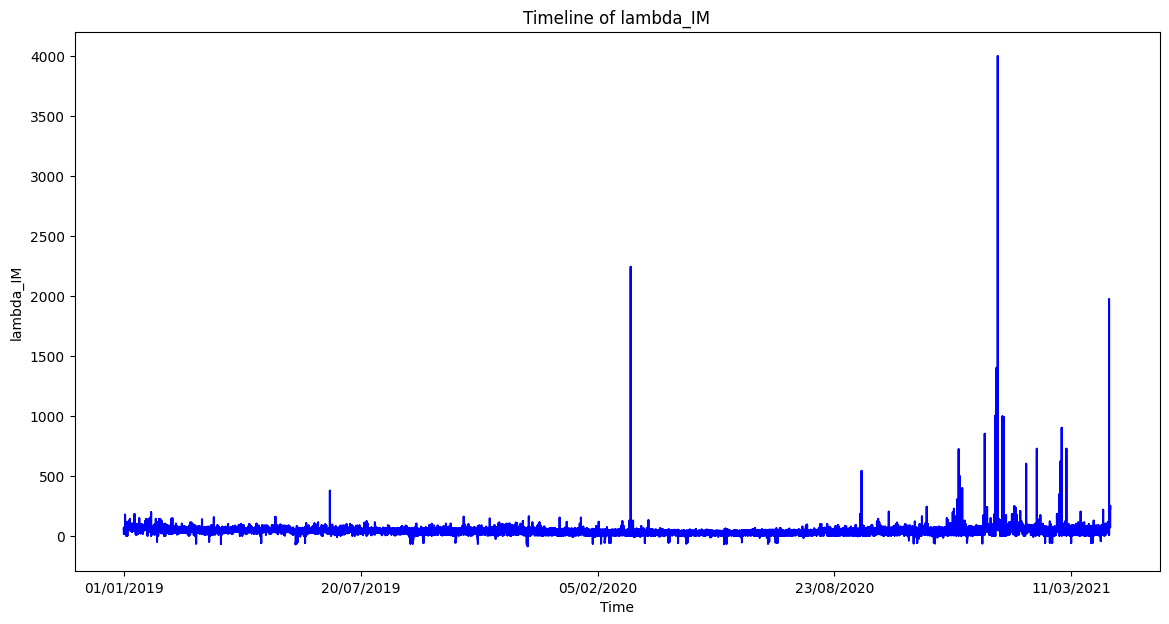

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Create plot
fig, ax = plt.subplots(figsize=(14, 7))  # Use fig and ax explicitly
ax.plot(data['Settlement Date'], data['lambda_IM'], color='blue')

# Title and labels
ax.set_title('Timeline of lambda_IM')
ax.set_xlabel('Time')
ax.set_ylabel('lambda_IM')

# Limit number of x-ticks
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))

plt.show()
